In [4]:
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import scipy.io as sio
from time import time

sys.path.insert(0,"/home/ch/archiv/PycharmProjects/liblp")
from liblp import *
branchfilename = "lp_branches_vmax_8.mat"


# calculate branches in the u-w plane (may take some time!)

In [5]:
t1 = time()
if False:
    points = 1000
    V=8
    res = {}
    for m in range(6):
        diff, uv=calc_jkdiff_matrix(m, V, pts=points)
        coord = []
        for i in range(points):
            pl = pyfindpeaks(5, 1/diff[i,:],30)
            if len(pl)>0:
                for k in range(len(pl)):
                    coord.append([uv[i], uv[pl[k]]])
        res[str(m)]=np.array(coord)
        
    print("Duration: %.2f "%(time()-t1))    
    
    def getbranchpoints(M, xmi, xma):
        iindx = np.nonzero(np.multiply( M[:,1]>=xmi , M[:,1]<xma))[0]
        uv = M[iindx, 1]
        wv = M[iindx, 0]
        return np.transpose(np.array([uv,wv]))
    
    uwbranches = {}
    uwbranches['01'] = getbranchpoints(res['0'], 0, 2.5)
    uwbranches['02'] = getbranchpoints(res['0'], 3.5, 5.2)
    uwbranches['03'] = getbranchpoints(res['0'], 6, 8)
    uwbranches['11'] = getbranchpoints(res['1'], 2, 4)
    uwbranches['12'] = getbranchpoints(res['1'], 5.5, 7)
    uwbranches['21'] = getbranchpoints(res['2'], 3, 5)
    uwbranches['22'] = getbranchpoints(res['2'], 6.5, 8)
    uwbranches['31'] = getbranchpoints(res['3'], 5, 6)
    uwbranches['41'] = getbranchpoints(res['4'], 0, 8)
    uwbranches['51'] = getbranchpoints(res['5'], 0, 8) 
    
    
    plt.figure()
    plt.subplot(321)
    m=0
    plt.title("m=0")
    plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['01'][:,0], uwbranches['01'][:,1])
    plt.plot(uwbranches['02'][:,0], uwbranches['02'][:,1])
    plt.plot(uwbranches['03'][:,0], uwbranches['03'][:,1])

    plt.subplot(322)
    plt.title("m=1")
    m=1
    plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['11'][:,0], uwbranches['11'][:,1])
    plt.plot(uwbranches['12'][:,0], uwbranches['12'][:,1])

    plt.subplot(323)
    plt.title("m=2")
    m=2
    plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['21'][:,0], uwbranches['21'][:,1])
    plt.plot(uwbranches['22'][:,0], uwbranches['22'][:,1])

    plt.subplot(324)
    plt.title("m=3")
    m=3
    plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['31'][:,0], uwbranches['31'][:,1])

    plt.subplot(325)
    plt.title("m=4")
    m=4
    plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['41'][:,0], uwbranches['41'][:,1])

    plt.subplot(326)
    plt.title("m=5")
    m=5
    #plt.plot(res[str(m)][:,1], res[str(m)][:,0],'o', ms=1)
    plt.plot(uwbranches['51'][:,0], uwbranches['51'][:,1])
    
    sio.savemat(branchfilename, uwbranches)

# Plot branches for V<=8

In [6]:
uwbranches = sio.loadmat(branchfilename)
#plt.figure(figsize=(2.,2.))
plt.figure(figsize=(6.,6.))


plt.plot(uwbranches['01'][:,0], uwbranches['01'][:,1])
plt.plot(uwbranches['02'][:,0], uwbranches['02'][:,1])
plt.plot(uwbranches['03'][:,0], uwbranches['03'][:,1])

plt.plot(uwbranches['11'][:,0], uwbranches['11'][:,1])
plt.plot(uwbranches['12'][:,0], uwbranches['12'][:,1])

plt.plot(uwbranches['21'][:,0], uwbranches['21'][:,1])
plt.plot(uwbranches['22'][:,0], uwbranches['22'][:,1])

plt.plot(uwbranches['31'][:,0], uwbranches['31'][:,1])

plt.plot(uwbranches['41'][:,0], uwbranches['41'][:,1])

plt.plot(uwbranches['51'][:,0], uwbranches['51'][:,1])

plt.xticks(np.arange(9))
plt.yticks(np.arange(9))
plt.xlim([0,8])
plt.ylim([0,8])

FileNotFoundError: [Errno 2] No such file or directory: 'lp_branches_vmax_8.mat'

# Plot branches and intersections for V=

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


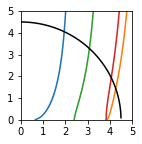

In [10]:
plt.figure(figsize=(2.,2.))
u = np.linspace(0, 4.999999, 500)

plt.plot(uwbranches['01'][:,0], uwbranches['01'][:,1])
plt.plot(uwbranches['02'][:,0], uwbranches['02'][:,1])


plt.plot(uwbranches['11'][:,0], uwbranches['11'][:,1])

plt.plot(uwbranches['21'][:,0], uwbranches['21'][:,1])
plt.xticks(np.arange(6))
plt.yticks(np.arange(6))
plt.plot(u, np.sqrt(4.5**2 - u**2), c='0.0')
plt.xlim([0,5])
plt.ylim([0,5])
#plt.savefig("u_w_plane_raw2.pdf")